## Statistics


## One-sample t-tests

In [1]:
import pandas as pd
import seaborn as sns

In [1]:
# Generate an array of 40 values that follow a N(30, 5) distribution
from numpy import random
random.seed(13)
out = random.normal(loc=30, scale=5, size=40)
out

array([26.43804669, 33.76883189, 29.77748461, 32.25906169, 36.72550854,
       32.66168944, 36.7509395 , 34.30605687, 37.39342869, 24.77311435,
       26.05505488, 23.69197027, 32.81423393, 28.78336874, 34.56870352,
       31.58675461, 30.6365164 , 40.75191484, 33.03144328, 29.86614175,
       25.07919609, 35.95352636, 34.76415306, 24.56409205, 29.27394334,
       31.18928919, 21.80453294, 28.60932742, 36.9961921 , 21.92446018,
       32.45435916, 39.46371109, 26.89510149, 27.73123809, 31.0872583 ,
       32.57164428, 31.98620663, 22.43577442, 26.17983015, 30.50634893])

In [2]:
out.mean()

30.702761244394896

In [6]:
from scipy import stats

# Run the test:
stats.ttest_1samp(out, popmean=30)

Ttest_1sampResult(statistic=0.9174340472708916, pvalue=0.3645541759696719)

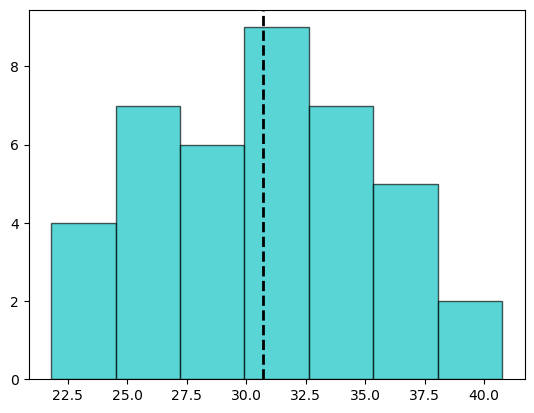

In [8]:
# Producing a plot of the data:
import matplotlib.pyplot as plt
result = plt.hist(out, bins=7, color='c', edgecolor='k', alpha=0.65)
plt.axvline(out.mean(), color='k', linestyle='dashed', linewidth=2) # Sample mean
#plt.axvline(mu, color='red', linestyle='solid', linewidth=2) # Hypothesised mu

## One-tailed Tests

In [9]:
# We just need to run:
from scipy import stats
stats.ttest_1samp(out, popmean=30, alternative = "greater")

Ttest_1sampResult(statistic=0.9174340472708916, pvalue=0.18227708798483594)

In [10]:
import numpy as np
random.seed(13)
rvs = random.normal(size=(100, 50), loc = 30, scale = 5)
res = stats.ttest_1samp(rvs, popmean=30, axis=1)
np.sum(res.pvalue < 0.05)

5

In [11]:
# Create a function to glimpse the data
def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    display(df.tail())

# Import package
from pydataset import data
# Check out datasets
data()

ModuleNotFoundError: No module named 'pydataset'

In [12]:
# Load as a dataframe
df = data('iris')
glimpse(df)

NameError: name 'data' is not defined

In [ ]:
# from scipy import stats
# stats.ttest_1samp(df['Sepal.Length'], popmean=5.5, alternative = "greater")

# from scipy import stats
# df1 = df[(df.Species=='virginica')]
# stats.ttest_1samp(df1['Petal.Width'], popmean=2)

## Two-sample t-tests

In [13]:
# Import the library
import scipy.stats as stats
import numpy as np
 
# Creating data groups
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12])
 
data_group2 = np.array([15, 17, 14, 17, 14, 8, 12,
                        19, 19, 14, 17, 22, 24, 16,
                        13, 16, 13, 18, 15, 13])

In [14]:
print(data_group1.mean(), data_group2.mean())

15.15 15.8


## Two-sample t-tests:

In [1]:
# Import the library
import scipy.stats as stats
import numpy as np
 
# Creating data groups
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12])
 
data_group2 = np.array([15, 17, 14, 17, 14, 8, 12,
                        19, 19, 14, 17, 22, 24, 16,
                        13, 16, 13, 18, 15, 13])

In [2]:
print(data_group1.mean(), data_group2.mean())

15.15 15.8


In [3]:
# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257)

In [4]:
# Perform the two-sample t-test:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=False)

Ttest_indResult(statistic=-0.6337397070250238, pvalue=0.5302413334606599)

In [5]:
# Subsetting:
df1 = df[(df.Species=='virginica')]
df2 = df[(df.Species=='versicolor')]

NameError: name 'df' is not defined

In [6]:
# Let's perform the test:
# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=df1['Sepal.Length'], b=df2['Sepal.Length'])

NameError: name 'df1' is not defined

In [7]:
# Let's confirm this using a plot:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a boxplot by group:
sns.boxplot(x = 'Species', y ='Sepal.Length',
            data=df)
plt.title('Box plot of Sepal Length by Species',
          fontsize=15)


NameError: name 'df' is not defined

## Hypothesis testing for proportions

In [8]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([81, 468])
nobs = np.array([314, 577])
stat, pval = proportions_ztest(count, nobs)
pval

3.7117477701134797e-59

## Hypothesis testing for paired (dependent) samples

In [9]:
# Importing library
import scipy.stats as stats
  
# pre holds the mileage before 
# applying the different engine oil
pre = [30, 31, 34, 40, 36, 35,
       34, 30, 28, 29]
  
# post holds the mileage after 
# applying the different engine oil
post = [30, 31, 32, 38, 32, 31,
        32, 29, 28, 30]
  
# Performing the paired sample t-test
stats.ttest_rel(pre, post)

Ttest_relResult(statistic=2.584921310565987, pvalue=0.029457853822895275)

## Hypothesis Tests III

In [10]:
# Import the packages needed
from scipy.stats import chisquare
from collections import Counter

# Create the data as it would be in a column (though obviously it wouldn't necessarily be in order in our results):
preferences = ["SF"] * 61 + ["FF"] * 53 + ["FG"] * 36
print(preferences)

['SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'SF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG']


In [11]:
# Convert to frequencies
counter = Counter(preferences)
frequencies = [count for count in counter.values()]
print(frequencies)

[61, 53, 36]


## Two-sample  𝜒2 tests

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv", usecols=['pclass','survived'])
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

NameError: name 'df' is not defined

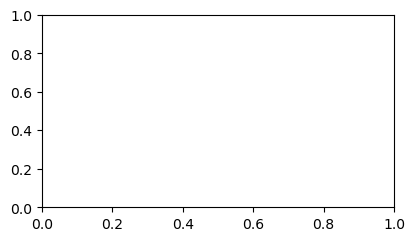

In [13]:
plt.figure(figsize=(10,2.5))

plt.subplot(121)
sns.countplot(df.pclass)
plt.title("Passenger Class")

plt.subplot(122)
sns.countplot(df.survived)
plt.title("Survived or not")

plt.show()

In [14]:
# Making a two-way contingency table:
PClass_survd = pd.pivot_table(df, index=['pclass'],columns=['survived'],aggfunc='size')
PClass_survd

NameError: name 'df' is not defined

In [15]:
# Perform a hypothesis test of indepdence between the rows and columns -
# that is, the null hypothesis is that whether someone survived or not is
# independent from their passenger class, that is, X is independent of Y
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(PClass_survd)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

NameError: name 'PClass_survd' is not defined

In [16]:
# A heatmap:
sns.heatmap(PClass_survd, annot=True, fmt='g',square=True, cmap='hot')
plt.title('Class Vs Survived',fontsize=20)
plt.show()


NameError: name 'PClass_survd' is not defined

  Survived Passenger Class  value
0       No           First    123
1      Yes           First    200
2       No          Second    158
3      Yes          Second    119
4       No           Third    528
5      Yes           Third    181


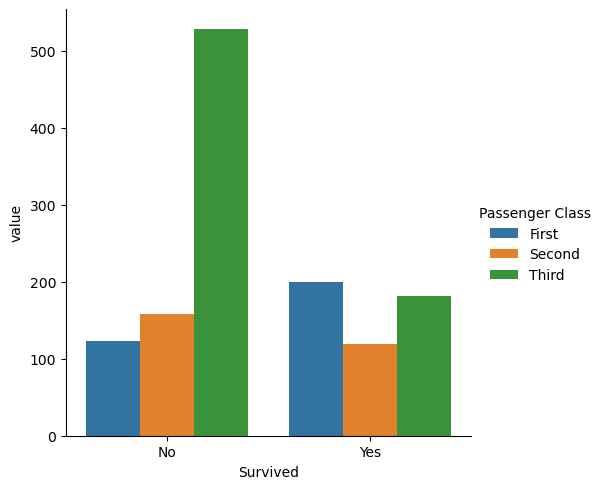

In [17]:
# Making a plot of the two-way table:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dfs = pd.DataFrame(data={'Survived': ['No','Yes'], 
                         'First': [123, 200], 
                         'Second': [158, 119], 
                         'Third': [528, 181]})

# Melt the dataframe:
dfs1 = pd.melt(dfs, id_vars = "Survived")
dfs1 = dfs1.rename(columns={"variable": "Passenger Class"})

print(dfs1)

sns.catplot(x = 'Survived', y='value', 
               hue = 'Passenger Class',data=dfs1, kind='bar')
plt.show()

## Tests regarding particular distributions (with a two-sample test included also):

In [19]:
# Reading in the prostate dataset:
prostate = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data',
                       sep='\t')
prostate.head()

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [20]:
prostate_numeric = prostate.drop(['Unnamed: 0','train'],axis=1)
prostate_std = (prostate_numeric-prostate_numeric.mean())/prostate_numeric.std()

In [21]:
print(round(prostate_std.corr(), 3))

         lcavol  lweight    age   lbph    svi    lcp  gleason  pgg45   lpsa
lcavol    1.000    0.281  0.225  0.027  0.539  0.675    0.432  0.434  0.734
lweight   0.281    1.000  0.348  0.442  0.155  0.165    0.057  0.107  0.433
age       0.225    0.348  1.000  0.350  0.118  0.128    0.269  0.276  0.170
lbph      0.027    0.442  0.350  1.000 -0.086 -0.007    0.078  0.078  0.180
svi       0.539    0.155  0.118 -0.086  1.000  0.673    0.320  0.458  0.566
lcp       0.675    0.165  0.128 -0.007  0.673  1.000    0.515  0.632  0.549
gleason   0.432    0.057  0.269  0.078  0.320  0.515    1.000  0.752  0.369
pgg45     0.434    0.107  0.276  0.078  0.458  0.632    0.752  1.000  0.422
lpsa      0.734    0.433  0.170  0.180  0.566  0.549    0.369  0.422  1.000


In [22]:
lpsa_gt_65 = prostate.lpsa[prostate.age>65]
lpsa_lt_65 = prostate.lpsa[prostate.age<=65]

In [23]:
stats.ttest_ind(lpsa_gt_65, lpsa_lt_65)

Ttest_indResult(statistic=2.0777882056885852, pvalue=0.04042631355837747)

<AxesSubplot:>

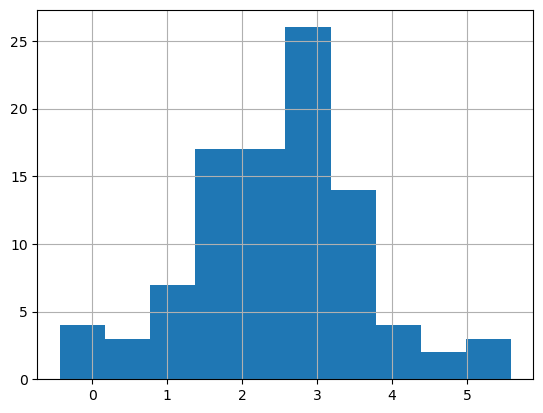

In [24]:
plt.figure()
prostate.lpsa.hist()

In [25]:
stats.kstest(prostate.lpsa, 'norm')

KstestResult(statistic=0.7943202030140284, pvalue=4.757662873905775e-66)

In [26]:
# Find the sample mean and standard deviation, our best estimate of mu and sigma:
# from pandas import mean
xbar = prostate.lpsa.mean()
s = prostate.lpsa.std()
# mean.lspa = pd.mean(prostate.lpsa)
stats.kstest(prostate.lpsa, 'norm', args = (xbar, s))

KstestResult(statistic=0.06551593415018797, pvalue=0.7743874556160386)

In [27]:
# Or:
stats.kstest(prostate_std.lpsa, 'norm')

KstestResult(statistic=0.06551593415018797, pvalue=0.7743874556160386)

## Two-sample KS test:

In [28]:
SA = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data')
SA.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [33]:
# Subsetting first:
df1 = SA[(SA.chd==1)]
df1.head()
# Subsetting first:
df0 = SA[(SA.chd==0)]
df0.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
12,13,118,0.00,1.88,10.05,Absent,59,21.57,0.00,17,0


In [34]:
# Running the test:
stats.ks_2samp(df0.sbp, df1.sbp)

KstestResult(statistic=0.16668046357615893, pvalue=0.0051131068242459094)

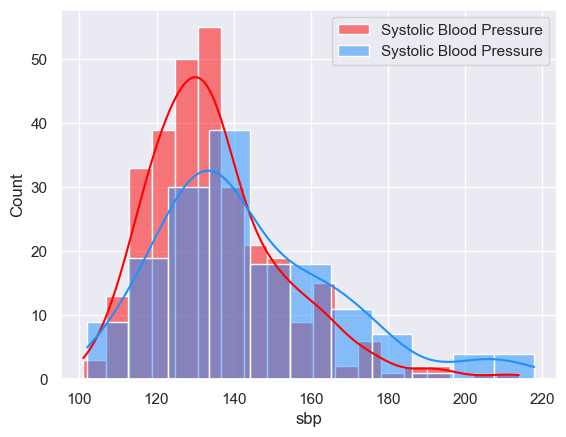

In [35]:
# An appropriate plot to see this:
import seaborn as sns
import matplotlib.pyplot as plt
# Set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset("iris")

sns.histplot(data=df0, x="sbp", color="red", label="Systolic Blood Pressure", kde=True)
sns.histplot(data=df1, x="sbp", color="dodgerblue", label="Systolic Blood Pressure", kde=True)

plt.legend() 
plt.show()

<AxesSubplot:xlabel='chd', ylabel='sbp'>

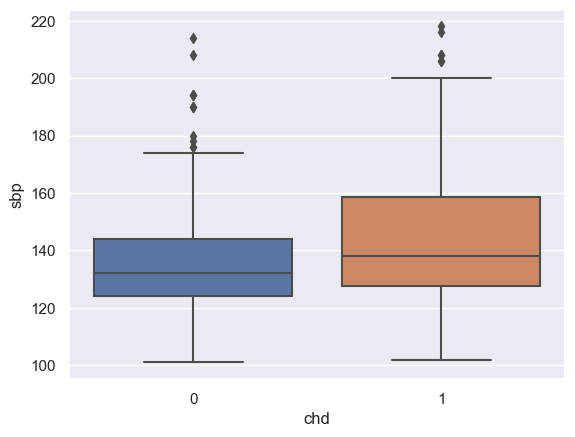

In [36]:
# Or alternatively:
sns.boxplot(data=SA, x="chd", y="sbp")

## Hypothesis Tests IV

In [37]:
# Create a function to glimpse the data
def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    display(df.tail())

# Import package
from pydataset import data

# Load as a dataframe
df = data('iris')
glimpse(df)

ModuleNotFoundError: No module named 'pydataset'

In [38]:
# Subsetting:
df1 = df[(df.Species=='setosa')]
df2 = df[(df.Species=='virginica')]
df3 = df[(df.Species=='versicolor')]

# Let's perform the test:
# Import the library
import scipy.stats as stats

# Perform the one-way ANOVA test:
stats.f_oneway(df1['Sepal.Length'], df2['Sepal.Length'], df3['Sepal.Length'])

NameError: name 'df' is not defined

In [39]:
import matplotlib.pyplot as plt

# Add three histograms to one plot
plt.hist(df1['Sepal.Length'], alpha=0.5, label='Setosa')
plt.hist(df2['Sepal.Length'], alpha=0.5, label='Versicolor')
plt.hist(df3['Sepal.Length'], alpha=0.5, label='Virginica')

# Add plot title and axis labels
plt.title('Sepal length by species')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='Species')

# Display plot
plt.show()

KeyError: 'Sepal.Length'

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey-Kramer Analysis:
tukey = pairwise_tukeyhsd(endog=df['Sepal.Length'],
                          groups=df['Species'],
                          alpha=0.05)

#display results
print(tukey)

NameError: name 'df' is not defined

In [41]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds', cache=True, data_home=None)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
# Perform the one-way ANOVA test - does the mean price per colour differ?
diamonds = sns.load_dataset('diamonds', cache=True, data_home=None)

# Let's take the first 1,000 rows:
diamonds = diamonds.head(int(1e3))

import scipy.stats as stats
stats.f_oneway(
 *(diamonds.loc[diamonds['color']==color, 'price'] 
 for color in diamonds['color'].unique())
 )

F_onewayResult(statistic=14.232408746791068, pvalue=1.3250352064676033e-15)

In [43]:
# Perform Tukey-Kramer Analysis
tukey = pairwise_tukeyhsd(endog=diamonds['price'],
                          groups=diamonds['color'],
                          alpha=0.05)

#display results
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     D      E   -51.809 0.9972   -312.445   208.827  False
     D      F   98.0582 0.9283  -165.3849  361.5013  False
     D      G  -18.1209    1.0  -309.9891  273.7474  False
     D      H -286.5718 0.0715  -586.2042   13.0605  False
     D      I -646.6851    0.0  -969.4521 -323.9181   True
     D      J -604.1625 0.0003 -1014.1465 -194.1784   True
     E      F  149.8672 0.4147   -71.4193  371.1537  False
     E      G   33.6882 0.9997   -220.777  288.1533  False
     E      H -234.7628  0.117  -498.0972   28.5715  False
     E      I -594.8761    0.0  -884.2616 -305.4906   True
     E      J -552.3534 0.0005  -936.6091 -168.0978   True
     F      G -116.1791  0.836  -373.5186  141.1605  False
     F      H -384.6301 0.0004   -650.743 -118.5171   True
     F      I -744.7433    0.0 -1036.6595 -452.8271   Tr